In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
import os 
%matplotlib inline

# PALLADIUM

In [46]:
#Type indicator name
indicator = 'palladium'

#Put path to the folder with data source
os.chdir('F:/GitHub/Analysis-and-forecast-of-stock-exchange-price-based-on-selected-indicators-using-machine-learning/data/azagorowski_data')

#Put source file name
source = indicator + '-prices-historical-chart-data.csv'

In [47]:
#Display options
pd.set_option('display.min_rows', 100)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 1000)

In [48]:
#Import data, skip description rows, use columns: date & value
df = pd.read_csv(source, skiprows=14,
                     usecols=['date',' value'])

#Convert column type to date time
df["date"] = pd.to_datetime(df["date"])

#Select price between 2010-01-01 and 2020-04-22
filter = (df['date'] >= '2010-01-01') & (df['date'] < '2020-04-22')
df = df[filter]

#Rename columns
df = df.rename(columns={'date': 'Date', ' value': 'Price'})

#Reset the index order
df.index = df['Date']
df = df.drop(columns=['Date'])

#Display Data Frame
df.head()

Price
Date              
2010-01-04  421.40
2010-01-05  421.95
2010-01-06  427.20
2010-01-07  424.55
2010-01-08  425.15

## Price chart

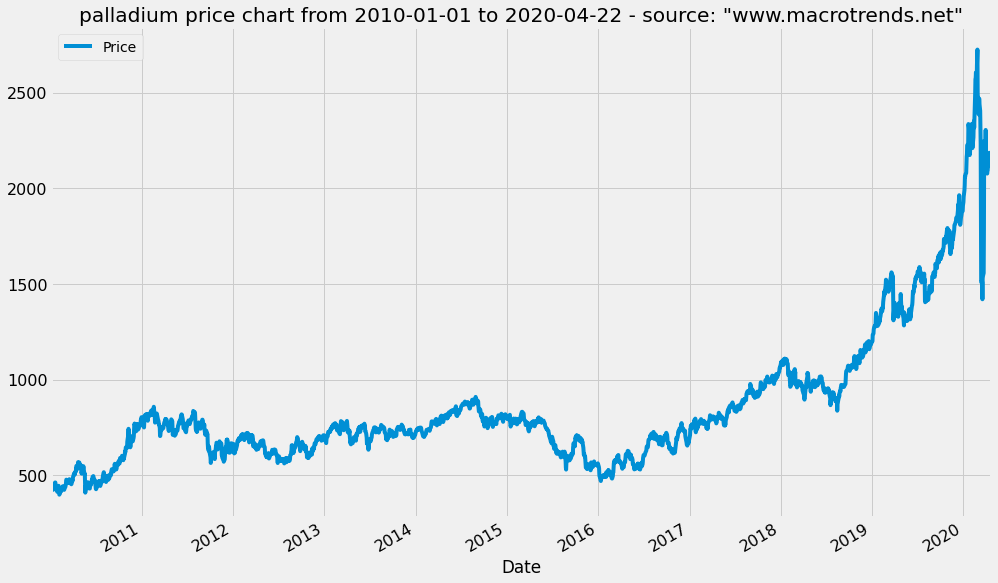

In [49]:
plt.style.use('fivethirtyeight')
df.plot(title=(indicator +" price chart from 2010-01-01 to 2020-04-22 - source: \"www.macrotrends.net\""),
            figsize=(15,10),grid=True,fontsize=16)

In [50]:
#Reset index and creating of new date column
df = df.reset_index()

#Rename columns for prophet library
df = df.rename(columns={'Date': 'ds', 'Price': 'y'})

#Display Data Frame
df.head()

ds       y
0 2010-01-04  421.40
1 2010-01-05  421.95
2 2010-01-06  427.20
3 2010-01-07  424.55
4 2010-01-08  425.15

In [51]:
#Import Prophet library
from fbprophet import Prophet

#Instantiating a new Prophet object
m = Prophet(daily_seasonality=True)

#Call object's fit method and pass in the historical dataframe
m.fit(df)

In [52]:
#Extend the "ds" column with forecast
future = m.make_future_dataframe(freq='D',periods=365)
future.tail()

ds
2956 2021-04-17
2957 2021-04-18
2958 2021-04-19
2959 2021-04-20
2960 2021-04-21

In [53]:
#Assign predicted values
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
2956 2021-04-17  2682.451872  2464.923746  2908.438187
2957 2021-04-18  2683.246577  2476.148588  2907.497484
2958 2021-04-19  2673.384582  2470.022659  2885.152005
2959 2021-04-20  2675.991425  2472.725987  2904.126718
2960 2021-04-21  2677.339110  2479.749947  2896.141221

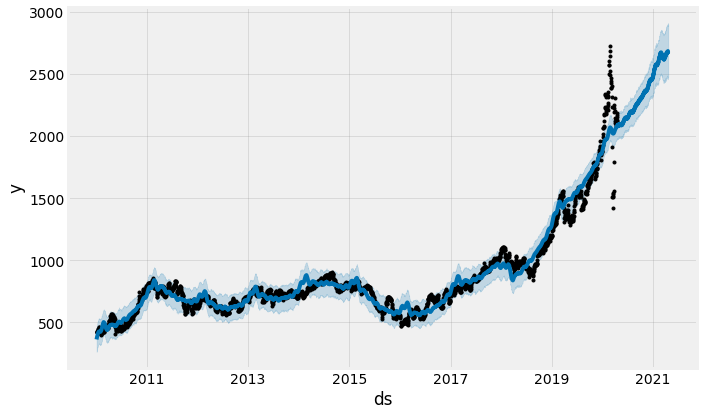

In [54]:
#Show a plot with the forecast
fig1 = m.plot(forecast)

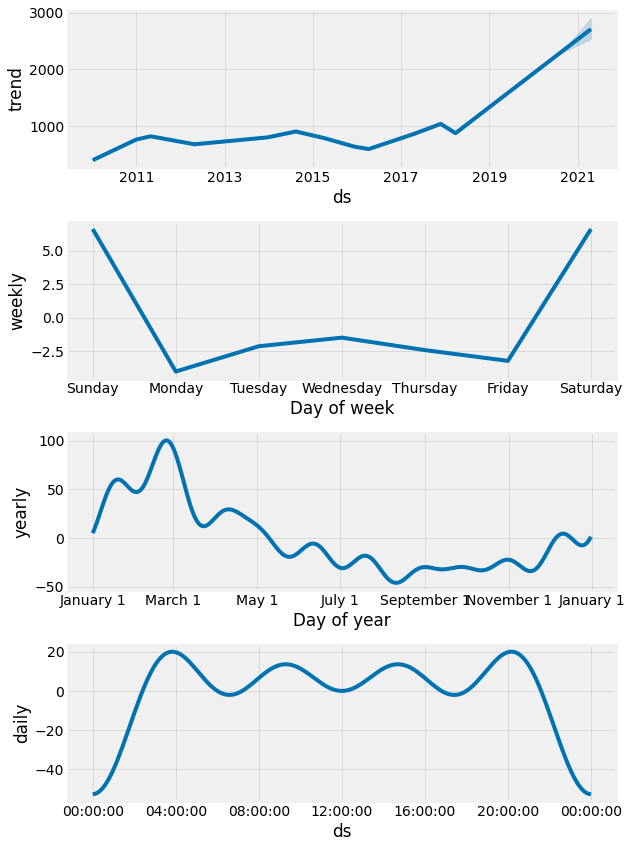

In [55]:
#Show a plot with components
fig2 = m.plot_components(forecast)

In [56]:
#Show interactive plot using plotly
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

#Add trendline to plot
fig = plot_plotly(m, forecast,trend=True)

#Update plot title, labels and other display options
fig.update_layout(
    title=(indicator +" price forecast 2021 using Prophet - source: \"www.macrotrends.net\""),
    xaxis_title="Date",
    yaxis_title="Price",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#242151"
    )
)
py.iplot(fig)

# Conclusions

In [57]:
#Merge two Data Frames (imported from .csv file and forecast) on date column ('ds')
df2 = df.merge(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']],sort=True,on=['ds'],how="outer")

#Rename the columns title
df2 = df2.rename(columns={'ds': 'Date', 'y': 'Index','yhat': 'Forecast',
                          'yhat_lower': 'Forecast_(lower)','yhat_upper': 'Forecast_(upper)'})

#Display header
df2.tail(15)

Date  Index     Forecast  Forecast_(lower)  Forecast_(upper)
2946 2021-04-07    NaN  2660.130981       2474.010520       2872.067708
2947 2021-04-08    NaN  2661.375741       2464.883950       2874.758103
2948 2021-04-09    NaN  2662.552294       2470.481489       2878.946097
2949 2021-04-10    NaN  2674.161697       2485.720742       2882.860616
2950 2021-04-11    NaN  2675.768790       2475.994206       2890.459215
2951 2021-04-12    NaN  2666.592186       2461.491654       2888.781505
2952 2021-04-13    NaN  2669.758368       2477.582154       2892.461993
2953 2021-04-14    NaN  2671.545423       2487.731033       2883.455686
2954 2021-04-15    NaN  2671.647519       2455.391205       2900.961433
2955 2021-04-16    NaN  2671.777257       2455.908610       2890.373575
2956 2021-04-17    NaN  2682.451872       2464.923746       2908.438187
2957 2021-04-18    NaN  2683.246577       2476.148588       2907.497484
2958 2021-04-19    NaN  2673.384582       2470.022659       2885.152005
2959 2021-04-20    NaN  2675.991425       2472.725987       2904.126718
2960 2021-04-21    NaN  2677.339110       2479.749947       2896.141221

In [58]:
#Calculation of mean for every column
meanIndex = df2['Index'].mean()
meanForecast = df2['Forecast'].mean()
meanForecastLower = df2['Forecast_(lower)'].mean()
meanForecastUpper = df2['Forecast_(upper)'].mean()

#Dictionary with mean values
meanDict = ({'Index': meanIndex, 'Forecast': meanForecast,
            'Forecast_(Lower)': meanForecastLower, 'Forecast_(Upper)': meanForecastUpper})
#Display mean
print('Average: ')
meanDict

Average: 


{'Index': 853.7294830246906,
 'Forecast': 1040.9558502949455,
 'Forecast_(Lower)': 935.037498261722,
 'Forecast_(Upper)': 1147.4865691073976}

In [59]:
#Max values
maxIndex = df2['Index'].max()
maxForecast = df2['Forecast'].max()
maxForecastLower = df2['Forecast_(lower)'].max()
maxForecastUpper = df2['Forecast_(upper)'].max()

#Dictionary with max values
maxDict = ({'Index': maxIndex, 'Forecast': maxForecast,
            'Forecast_(Lower)': maxForecastLower, 'Forecast_(Upper)': maxForecastUpper})
#Display max
print('Max: ')
maxDict

Max: 


{'Index': 2724.9,
 'Forecast': 2683.2465766076434,
 'Forecast_(Lower)': 2505.0535737257032,
 'Forecast_(Upper)': 2908.4381873580237}

In [60]:
#Min values
minIndex = df2['Index'].min()
minForecast = df2['Forecast'].min()
minForecastLower = df2['Forecast_(lower)'].min()
minForecastUpper = df2['Forecast_(upper)'].min()

#Dictionary with min values
minDict = ({'Index': minIndex, 'Forecast': minForecast,
            'Forecast_(Lower)': minForecastLower, 'Forecast_(Upper)': minForecastUpper})
#Display mean
print('Min: ')
minDict

Min: 


{'Index': 398.25,
 'Forecast': 362.9337975039872,
 'Forecast_(Lower)': 262.9688317951673,
 'Forecast_(Upper)': 466.8755572080641}

In [61]:
#How many rows is above or below average predicted value
indexAboveMeanForecast = df2["Index"].between(meanForecast,maxIndex)
indexBelowMeanForecast = df2["Index"].between(minIndex,meanForecast)

In [62]:
#Smallest value date
minIndex = df2.nsmallest(n=1,columns='Index')
minIndexValue = minIndex['Index'].loc[minIndex.index]
minIndexDate = minIndex['Date'].loc[minIndex.index].to_string(index=False)

#Largest value date
maxIndex = df2.nlargest(n=1,columns='Index')
maxIndexValue = maxIndex['Index'].loc[maxIndex.index]
maxIndexDate = maxIndex['Date'].loc[maxIndex.index].to_string(index=False)

#Smallest predicted value date
minForecast = df2.nsmallest(n=1,columns='Forecast')
minForecastValue = minForecast['Forecast'].loc[minForecast.index]
minForecastDate = minForecast['Date'].loc[minForecast.index].to_string(index=False)

#Largest predicted value date
maxForecast = df2.nlargest(n=1,columns='Forecast')
maxForecastValue = maxForecast['Forecast'].loc[maxForecast.index]
maxForecastDate = maxForecast['Date'].loc[maxForecast.index].to_string(index=False)
maxForecastDate

'2021-04-18'

# SUMMARY

In [63]:
print('The average index value is %f and the average predicted value is %f .' % (meanIndex, meanForecast))
print('There are %d rows (values) above average predicted value.' % len(df2[indexAboveMeanForecast]))
print('There are %d rows (values) below average predicted value.' % len(df2[indexBelowMeanForecast]))
print('The smallest index value is %f on %s .' % (minIndexValue, minIndexDate))
print('The largest index value is %f on %s .' % (maxIndexValue, maxIndexDate))
print('The smallest predicted value is %f on %s .' % (minForecastValue, minForecastDate))
print('The largest predicted value is %f on %s .' % (maxForecastValue, maxForecastDate))

The average index value is 853.729483 and the average predicted value is 1040.955850 .
There are 424 rows (values) above average predicted value.
There are 2168 rows (values) below average predicted value.
The smallest index value is 398.250000 on 2010-02-05 .
The largest index value is 2724.900000 on 2020-02-27 .
The smallest predicted value is 362.933798 on 2010-01-04 .
The largest predicted value is 2683.246577 on 2021-04-18 .


# Saving DF with predictions to DB

In [64]:
#Destination folder
os.chdir('F:/GitHub/Analysis-and-forecast-of-stock-exchange-price-based-on-selected-indicators-using-machine-learning/data')

import sqlite3

In [65]:
# Creating a database with predictions
conn = sqlite3.connect('predictionsAZ.db')
c = conn.cursor()

In [66]:
# Creating a table
c.execute('CREATE TABLE '+indicator+' ([Date] date PRIMARY KEY, [Index] float, [Forecast] float, [Forecast_(lower)] float, [Forecast_(upper)] float)')
conn.commit()

In [67]:
# Saving data frame to database 
df2.to_sql(indicator, conn, if_exists='replace', index = False)

In [68]:
# Extracing records from database (just for a test)

c.execute('''  
SELECT * FROM '''+indicator+'''
          ''')
for row in c.fetchall():
    print (row)

('2010-01-04 00:00:00', 421.4, 362.9337975039872, 262.9688317951673, 466.8755572080641)
('2010-01-05 00:00:00', 421.95, 369.87926805445977, 263.7381322980779, 466.99735173073447)
('2010-01-06 00:00:00', 427.2, 375.71187762127244, 271.7734571656605, 474.05835855698643)
('2010-01-07 00:00:00', 424.55, 380.0366484178969, 271.4856897484377, 479.2611351058749)
('2010-01-08 00:00:00', 425.15, 384.4744809585653, 274.3592390147827, 486.1197110882465)
('2010-01-11 00:00:00', 431.95, 398.61952546467427, 306.1679010349908, 502.43854134105266)
('2010-01-12 00:00:00', 425.8, 405.0009698627613, 303.4440713684017, 510.5206378840003)
('2010-01-13 00:00:00', 424.95, 409.80313466926765, 305.20644234353983, 513.4958358122391)
('2010-01-14 00:00:00', 443.05, 412.65506375151193, 308.18401128528154, 508.3724595654957)
('2010-01-15 00:00:00', 447.75, 415.2133321726743, 314.7134727417925, 517.1685489627936)
('2010-01-19 00:00:00', 461.95, 425.2198471435451, 323.6314596327538, 532.533762810222)
('2010-01-20 00

('2019-11-20 00:00:00', 1741.8, 1776.335905054957, 1667.4935890743088, 1872.2451063348396)
('2019-11-21 00:00:00', 1731.9, 1777.969415038766, 1675.1054318580275, 1874.0771508885011)
('2019-11-22 00:00:00', 1743.4, 1780.0203585783997, 1677.0203602184738, 1877.9898417953334)
('2019-11-25 00:00:00', 1771.52, 1789.4017619840486, 1685.6750480774585, 1885.7223011110557)
('2019-11-26 00:00:00', 1782.18, 1795.1321675464712, 1686.9407059053547, 1900.0283659896713)
('2019-11-27 00:00:00', 1808.1, 1799.7900753680633, 1698.329155321782, 1911.6921397992026)
('2019-11-29 00:00:00', 1811.2, 1806.4303956143033, 1705.2206347234153, 1914.3261972421703)
('2019-12-02 00:00:00', 1824.7, 1818.2890785523634, 1708.821355907515, 1925.8106259333322)
('2019-12-03 00:00:00', 1824.4, 1824.211188654161, 1727.7022966624274, 1932.1314111194672)
('2019-12-04 00:00:00', 1845.4, 1828.7200515598888, 1722.5213258410722, 1931.4192655550733)
('2019-12-05 00:00:00', 1845.7, 1831.4469377221837, 1728.5708331015758, 1941.531552